In [1]:
print("test")

test


In [2]:
!pip install -r requirements.txt

zsh:1: /Users/abdul/Documents/GitHub/testing/yolo/venv/bin/pip: bad interpreter: /Users/abdul/Documents/GitHub/testing/venv/bin/python3.12: no such file or directory


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def parse_segmentation_data(segmentation_str):
    """
    Parse the segmentation data from the YOLOv8 format.
    Returns a list of tuples: (class_id, polygon) where class_id is either 0 or 1
    and polygon is a list of (x, y) points.
    """
    polygons = []
    lines = segmentation_str.strip().split('\n')
    for line in lines:
        data = line.split()
        class_id = int(data[0])  # First element is the class ID (0 or 1)
        # Each line starts with a class index, skip it and process the (x, y) pairs.
        polygon = [(float(data[i]), float(data[i+1])) for i in range(1, len(data), 2)]
        polygons.append((class_id, polygon))
    return polygons

def plot_segmentation(image_path, segmentation_str):
    """
    Plot the segmentation polygons on the image.
    """
    # Load the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib

    # Parse the segmentation data
    polygons = parse_segmentation_data(segmentation_str)

    # Plot the image
    plt.figure(figsize=(10, 10))
    plt.imshow(image)

    # Define different colors for classes 0 and 1
    class_colors = {0: 'red', 1: 'blue'}

    # Overlay the polygons
    for class_id, polygon in polygons:
        polygon = np.array(polygon)
        # Rescale from relative coordinates (0-1) to image size
        polygon[:, 0] *= image.shape[1]  # Scale x
        polygon[:, 1] *= image.shape[0]  # Scale y
        # Draw the polygon with the color corresponding to its class
        plt.fill(polygon[:, 0], polygon[:, 1], edgecolor=class_colors[class_id], fill=False, linewidth=2, label=f'Class {class_id}')

    plt.axis('off')
    # plt.legend()
    plt.show()


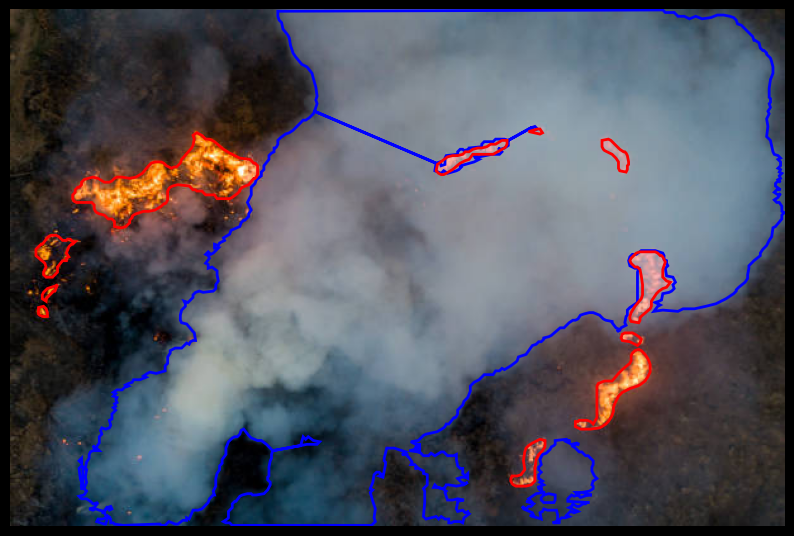

In [2]:


# Example usage
segmentation_str = """1 0.088235 0.872549 0.091503 0.877451 0.091503 0.867647 0.088235 0.872549
1 0.717320 0.830882 0.718954 0.833333 0.722222 0.833333 0.717320 0.835784 0.723856 0.840686 0.730392 0.838235 0.733660 0.840686 0.728758 0.840686 0.727124 0.843137 0.723856 0.843137 0.728758 0.848039 0.733660 0.855392 0.736928 0.855392 0.741830 0.862745 0.745098 0.862745 0.751634 0.872549 0.751634 0.879902 0.750000 0.884804 0.750000 0.892157 0.753268 0.901961 0.756536 0.906863 0.751634 0.911765 0.750000 0.919118 0.751634 0.921569 0.751634 0.926471 0.746732 0.931373 0.736928 0.933824 0.743464 0.936275 0.745098 0.938725 0.750000 0.938725 0.745098 0.938725 0.735294 0.943627 0.732026 0.938725 0.732026 0.938725 0.735294 0.933824 0.728758 0.933824 0.732026 0.938725 0.732026 0.938725 0.727124 0.941176 0.723856 0.938725 0.718954 0.946078 0.718954 0.950980 0.746732 0.953431 0.743464 0.953431 0.741830 0.955882 0.738562 0.955882 0.733660 0.960784 0.730392 0.960784 0.725490 0.955882 0.723856 0.960784 0.720588 0.963235 0.728758 0.968137 0.732026 0.970588 0.727124 0.973039 0.722222 0.970588 0.717320 0.977941 0.720588 0.980392 0.715686 0.982843 0.710784 0.982843 0.705882 0.990196 0.709150 0.992647 0.702614 0.992647 0.699346 0.992647 0.704248 0.990196 0.705882 0.985294 0.705882 0.977941 0.704248 0.968137 0.692810 0.968137 0.687908 0.965686 0.686275 0.970588 0.683007 0.973039 0.684641 0.985294 0.679739 0.982843 0.673203 0.980392 0.669935 0.977941 0.674837 0.977941 0.673203 0.973039 0.661765 0.965686 0.660131 0.960784 0.665033 0.965686 0.668301 0.960784 0.671569 0.960784 0.674837 0.955882 0.665033 0.950980 0.671569 0.950980 0.668301 0.946078 0.678105 0.936275 0.687908 0.933824 0.687908 0.938725 0.684641 0.943627 0.684641 0.948529 0.687908 0.953431 0.700980 0.953431 0.702614 0.948529 0.702614 0.943627 0.702614 0.938725 0.694444 0.936275 0.687908 0.938725 0.687908 0.933824 0.683007 0.928922 0.686275 0.926471 0.679739 0.924020 0.687908 0.919118 0.683007 0.914216 0.686275 0.911765 0.681373 0.906863 0.681373 0.899510 0.684641 0.894608 0.681373 0.889706 0.681373 0.884804 0.684641 0.879902 0.683007 0.870098 0.686275 0.860294 0.691176 0.857843 0.696078 0.850490 0.697712 0.845588 0.700980 0.843137 0.702614 0.840686 0.702614 0.833333 0.717320 0.830882
1 0.841503 0.000000 0.844771 0.004902 0.856209 0.004902 0.861111 0.012255 0.869281 0.012255 0.875817 0.017157 0.883987 0.012255 0.892157 0.017157 0.903595 0.014706 0.911765 0.009804 0.919935 0.009804 0.928105 0.012255 0.933007 0.014706 0.936275 0.019608 0.937908 0.026961 0.942810 0.029412 0.952614 0.044118 0.957516 0.051471 0.959150 0.058824 0.960784 0.058824 0.965686 0.063725 0.967320 0.073529 0.970588 0.078431 0.972222 0.078431 0.975490 0.083333 0.975490 0.085784 0.980392 0.093137 0.982026 0.100490 0.983660 0.110294 0.983660 0.122549 0.980392 0.134804 0.978758 0.151961 0.978758 0.169118 0.980392 0.171569 0.980392 0.178922 0.978758 0.181373 0.980392 0.188725 0.977124 0.196078 0.978758 0.200980 0.975490 0.210784 0.977124 0.225490 0.975490 0.245098 0.980392 0.252451 0.983660 0.274510 0.985294 0.279412 0.990196 0.281863 0.993464 0.286765 0.990196 0.289216 0.993464 0.294118 0.993464 0.301471 0.990196 0.306373 0.993464 0.308824 0.991830 0.313725 0.995098 0.316176 0.991830 0.321078 0.993464 0.325980 0.990196 0.328431 0.993464 0.333333 0.990196 0.330882 0.986928 0.335784 0.986928 0.340686 0.993464 0.348039 0.988562 0.348039 0.985294 0.352941 0.990196 0.357843 0.993464 0.355392 0.990196 0.362745 0.985294 0.367647 0.988562 0.372549 0.991830 0.372549 0.995098 0.379902 0.995098 0.389706 0.998366 0.392157 0.995098 0.397059 0.995098 0.404412 0.986928 0.419118 0.983660 0.421569 0.982026 0.438725 0.978758 0.446078 0.975490 0.455882 0.970588 0.463235 0.967320 0.470588 0.967320 0.475490 0.959150 0.485294 0.955882 0.490196 0.952614 0.495098 0.952614 0.500000 0.950980 0.512255 0.950980 0.519608 0.947712 0.526961 0.939542 0.536765 0.936275 0.541667 0.936275 0.544118 0.933007 0.549020 0.928105 0.553922 0.923203 0.558824 0.910131 0.568627 0.903595 0.571078 0.897059 0.573529 0.882353 0.578431 0.867647 0.578431 0.861111 0.583333 0.841503 0.580882 0.830065 0.583333 0.834967 0.573529 0.838235 0.571078 0.831699 0.566176 0.836601 0.563725 0.839869 0.561275 0.841503 0.549020 0.849673 0.546569 0.852941 0.544118 0.856209 0.539216 0.854575 0.531863 0.857843 0.526961 0.854575 0.517157 0.846405 0.514706 0.844771 0.500000 0.848039 0.495098 0.846405 0.490196 0.846405 0.485294 0.843137 0.482843 0.843137 0.475490 0.841503 0.470588 0.831699 0.465686 0.813725 0.465686 0.807190 0.473039 0.802288 0.473039 0.799020 0.477941 0.797386 0.485294 0.799020 0.495098 0.802288 0.497549 0.805556 0.500000 0.810458 0.500000 0.808824 0.507353 0.808824 0.566176 0.799020 0.575980 0.795752 0.580882 0.795752 0.590686 0.794118 0.593137 0.792484 0.605392 0.794118 0.610294 0.787582 0.615196 0.785948 0.620098 0.782680 0.622549 0.784314 0.617647 0.781046 0.615196 0.776144 0.605392 0.776144 0.602941 0.767974 0.600490 0.764706 0.598039 0.759804 0.590686 0.751634 0.585784 0.746732 0.585784 0.740196 0.588235 0.735294 0.590686 0.732026 0.598039 0.728758 0.600490 0.725490 0.600490 0.720588 0.605392 0.714052 0.615196 0.709150 0.615196 0.697712 0.629902 0.694444 0.632353 0.687908 0.634804 0.687908 0.637255 0.684641 0.642157 0.681373 0.642157 0.678105 0.647059 0.673203 0.649510 0.665033 0.666667 0.655229 0.671569 0.653595 0.678922 0.651961 0.681373 0.645425 0.688725 0.637255 0.696078 0.633987 0.693627 0.630719 0.698529 0.625817 0.698529 0.622549 0.705882 0.611111 0.705882 0.604575 0.715686 0.598039 0.720588 0.593137 0.727941 0.593137 0.737745 0.589869 0.750000 0.584967 0.757353 0.583333 0.764706 0.576797 0.774510 0.576797 0.781863 0.575163 0.786765 0.573529 0.789216 0.571895 0.789216 0.565359 0.801471 0.562092 0.801471 0.560458 0.806373 0.558824 0.808824 0.550654 0.816176 0.535948 0.821078 0.532680 0.823529 0.526144 0.833333 0.516340 0.835784 0.522876 0.840686 0.527778 0.840686 0.527778 0.845588 0.527778 0.845588 0.524510 0.840686 0.522876 0.845588 0.527778 0.845588 0.527778 0.845588 0.527778 0.850490 0.527778 0.855392 0.526144 0.855392 0.522876 0.848039 0.521242 0.850490 0.514706 0.852941 0.526144 0.855392 0.527778 0.855392 0.532680 0.862745 0.539216 0.862745 0.542484 0.857843 0.547386 0.862745 0.555556 0.855392 0.558824 0.855392 0.563725 0.862745 0.571895 0.862745 0.575163 0.860294 0.575163 0.870098 0.576797 0.882353 0.580065 0.887255 0.583333 0.887255 0.583333 0.897059 0.586601 0.901961 0.589869 0.897059 0.589869 0.906863 0.586601 0.904412 0.581699 0.904412 0.576797 0.906863 0.581699 0.914216 0.586601 0.916667 0.589869 0.914216 0.584967 0.919118 0.575163 0.921569 0.565359 0.919118 0.562092 0.919118 0.560458 0.924020 0.557190 0.926471 0.550654 0.924020 0.547386 0.919118 0.545752 0.924020 0.550654 0.924020 0.557190 0.926471 0.562092 0.931373 0.560458 0.933824 0.563725 0.948529 0.570261 0.948529 0.576797 0.946078 0.584967 0.948529 0.576797 0.950980 0.576797 0.953431 0.575163 0.965686 0.576797 0.970588 0.583333 0.968137 0.586601 0.973039 0.591503 0.970588 0.588235 0.973039 0.591503 0.975490 0.584967 0.982843 0.583333 0.992647 0.580065 0.990196 0.571895 0.990196 0.568627 0.992647 0.565359 0.992647 0.565359 0.985294 0.560458 0.985294 0.555556 0.980392 0.552288 0.985294 0.549020 0.980392 0.535948 0.985294 0.532680 0.980392 0.534314 0.953431 0.534314 0.931373 0.532680 0.926471 0.537582 0.919118 0.537582 0.914216 0.537582 0.899510 0.532680 0.897059 0.532680 0.892157 0.526144 0.887255 0.521242 0.887255 0.524510 0.884804 0.521242 0.879902 0.516340 0.879902 0.517974 0.875000 0.514706 0.867647 0.511438 0.862745 0.511438 0.860294 0.504902 0.860294 0.509804 0.855392 0.495098 0.848039 0.485294 0.848039 0.482026 0.867647 0.482026 0.872549 0.483660 0.875000 0.483660 0.879902 0.480392 0.904412 0.475490 0.901961 0.478758 0.899510 0.475490 0.894608 0.472222 0.894608 0.468954 0.899510 0.467320 0.914216 0.464052 0.926471 0.467320 0.928922 0.464052 0.933824 0.467320 0.950980 0.470588 0.965686 0.468954 0.982843 0.470588 0.990196 0.465686 0.997549 0.285948 0.997549 0.282680 0.992647 0.277778 0.992647 0.274510 0.990196 0.279412 0.985294 0.281046 0.982843 0.281046 0.980392 0.281046 0.970588 0.285948 0.963235 0.285948 0.955882 0.289216 0.950980 0.290850 0.950980 0.295752 0.941176 0.299020 0.938725 0.305556 0.936275 0.310458 0.936275 0.312092 0.938725 0.316993 0.938725 0.326797 0.936275 0.331699 0.928922 0.333333 0.924020 0.334967 0.919118 0.334967 0.914216 0.331699 0.909314 0.331699 0.904412 0.333333 0.901961 0.333333 0.897059 0.333333 0.884804 0.334967 0.872549 0.336601 0.867647 0.336601 0.860294 0.338235 0.852941 0.374183 0.843137 0.382353 0.840686 0.395425 0.840686 0.398693 0.835784 0.390523 0.833333 0.383987 0.825980 0.380719 0.830882 0.377451 0.825980 0.374183 0.843137 0.338235 0.852941 0.330065 0.840686 0.323529 0.833333 0.318627 0.833333 0.310458 0.828431 0.307190 0.823529 0.300654 0.811275 0.297386 0.813725 0.295752 0.821078 0.292484 0.825980 0.289216 0.825980 0.285948 0.828431 0.281046 0.835784 0.277778 0.848039 0.277778 0.860294 0.272876 0.870098 0.272876 0.877451 0.269608 0.882353 0.269608 0.889706 0.266340 0.897059 0.264706 0.906863 0.264706 0.921569 0.261438 0.931373 0.263072 0.938725 0.261438 0.938725 0.256536 0.946078 0.254902 0.953431 0.246732 0.965686 0.241830 0.968137 0.235294 0.968137 0.230392 0.985294 0.227124 0.982843 0.227124 0.987745 0.222222 0.987745 0.215686 0.995098 0.212418 0.995098 0.204248 0.990196 0.199346 0.997549 0.194444 0.997549 0.192810 0.995098 0.187908 0.995098 0.145425 0.997549 0.133987 0.995098 0.132353 0.992647 0.129085 0.992647 0.129085 0.985294 0.125817 0.980392 0.122549 0.995098 0.120915 0.995098 0.111111 0.990196 0.112745 0.985294 0.119281 0.985294 0.125817 0.980392 0.122549 0.977941 0.120915 0.973039 0.117647 0.973039 0.120915 0.970588 0.124183 0.963235 0.127451 0.968137 0.130719 0.965686 0.129085 0.960784 0.124183 0.963235 0.120915 0.970588 0.114379 0.968137 0.109477 0.965686 0.106209 0.968137 0.101307 0.965686 0.107843 0.963235 0.112745 0.953431 0.106209 0.955882 0.102941 0.950980 0.098039 0.946078 0.091503 0.946078 0.088235 0.941176 0.094771 0.938725 0.098039 0.931373 0.094771 0.926471 0.094771 0.926471 0.098039 0.914216 0.096405 0.904412 0.098039 0.889706 0.093137 0.887255 0.093137 0.904412 0.093137 0.909314 0.093137 0.919118 0.091503 0.921569 0.094771 0.926471 0.094771 0.926471 0.091503 0.926471 0.091503 0.914216 0.089869 0.906863 0.088235 0.887255 0.091503 0.882353 0.096405 0.887255 0.098039 0.875000 0.101307 0.867647 0.101307 0.860294 0.102941 0.855392 0.106209 0.852941 0.114379 0.852941 0.111111 0.848039 0.107843 0.848039 0.106209 0.843137 0.109477 0.848039 0.114379 0.838235 0.114379 0.825980 0.117647 0.821078 0.116013 0.813725 0.117647 0.808824 0.122549 0.811275 0.127451 0.808824 0.129085 0.803922 0.127451 0.794118 0.130719 0.791667 0.130719 0.781863 0.132353 0.779412 0.135621 0.774510 0.132353 0.769608 0.135621 0.767157 0.133987 0.762255 0.137255 0.759804 0.135621 0.754902 0.137255 0.750000 0.132353 0.747549 0.135621 0.742647 0.132353 0.740196 0.137255 0.735294 0.143791 0.735294 0.145425 0.732843 0.147059 0.730392 0.151961 0.727941 0.148693 0.725490 0.151961 0.723039 0.156863 0.720588 0.158497 0.715686 0.166667 0.715686 0.174837 0.710784 0.171569 0.708333 0.176471 0.703431 0.179739 0.700980 0.187908 0.703431 0.199346 0.698529 0.199346 0.696078 0.199346 0.688725 0.202614 0.683824 0.202614 0.671569 0.205882 0.664216 0.205882 0.659314 0.212418 0.654412 0.220588 0.654412 0.227124 0.644608 0.230392 0.647059 0.232026 0.642157 0.235294 0.639706 0.238562 0.639706 0.236928 0.625000 0.235294 0.622549 0.227124 0.607843 0.220588 0.605392 0.218954 0.600490 0.218954 0.590686 0.220588 0.580882 0.225490 0.573529 0.225490 0.568627 0.223856 0.563725 0.228758 0.566176 0.235294 0.556373 0.235294 0.551471 0.238562 0.546569 0.243464 0.544118 0.248366 0.546569 0.261438 0.544118 0.264706 0.539216 0.264706 0.531863 0.267974 0.524510 0.266340 0.512255 0.266340 0.504902 0.259804 0.497549 0.254902 0.500000 0.254902 0.492647 0.251634 0.490196 0.256536 0.480392 0.254902 0.475490 0.251634 0.473039 0.254902 0.468137 0.258170 0.473039 0.261438 0.470588 0.267974 0.460784 0.263072 0.460784 0.263072 0.453431 0.267974 0.455882 0.269608 0.450980 0.276144 0.446078 0.274510 0.441176 0.282680 0.433824 0.284314 0.426471 0.295752 0.419118 0.297386 0.411765 0.300654 0.406863 0.302288 0.406863 0.307190 0.399510 0.307190 0.394608 0.310458 0.387255 0.305556 0.372549 0.307190 0.367647 0.310458 0.357843 0.310458 0.343137 0.315359 0.335784 0.316993 0.328431 0.323529 0.321078 0.323529 0.313725 0.326797 0.308824 0.326797 0.301471 0.333333 0.289216 0.333333 0.281863 0.336601 0.276961 0.339869 0.274510 0.339869 0.267157 0.341503 0.267157 0.343137 0.264706 0.344771 0.259804 0.344771 0.252451 0.348039 0.247549 0.354575 0.240196 0.359477 0.237745 0.364379 0.232843 0.377451 0.213235 0.380719 0.213235 0.385621 0.208333 0.390523 0.200980 0.392157 0.196078 0.549020 0.296569 0.547386 0.311275 0.555556 0.316176 0.558824 0.311275 0.563725 0.316176 0.575163 0.311275 0.578431 0.308824 0.581699 0.303922 0.580065 0.301471 0.586601 0.299020 0.598039 0.294118 0.604575 0.289216 0.599673 0.286765 0.598039 0.281863 0.604575 0.284314 0.620915 0.279412 0.630719 0.279412 0.633987 0.274510 0.629085 0.267157 0.632353 0.269608 0.637255 0.267157 0.642157 0.262255 0.642157 0.254902 0.642157 0.252451 0.671569 0.227941 0.674837 0.232843 0.679739 0.230392 0.676471 0.225490 0.671569 0.227941 0.642157 0.252451 0.637255 0.250000 0.625817 0.250000 0.622549 0.254902 0.611111 0.254902 0.607843 0.259804 0.607843 0.264706 0.591503 0.267157 0.591503 0.269608 0.584967 0.272059 0.583333 0.269608 0.580065 0.269608 0.576797 0.274510 0.576797 0.279412 0.562092 0.281863 0.560458 0.286765 0.560458 0.299020 0.555556 0.301471 0.553922 0.294118 0.549020 0.296569 0.392157 0.196078 0.395425 0.181373 0.393791 0.174020 0.395425 0.166667 0.393791 0.149510 0.390523 0.132353 0.388889 0.122549 0.382353 0.110294 0.375817 0.105392 0.367647 0.090686 0.364379 0.083333 0.362745 0.075980 0.361111 0.068627 0.359477 0.053922 0.357843 0.049020 0.351307 0.036765 0.349673 0.024510 0.346405 0.019608 0.344771 0.012255 0.344771 0.007353 0.344771 0.002451 0.841503 0.000000
0 0.683007 0.830882 0.673203 0.838235 0.668301 0.843137 0.665033 0.848039 0.663399 0.855392 0.661765 0.872549 0.663399 0.889706 0.658497 0.899510 0.653595 0.901961 0.647059 0.901961 0.645425 0.906863 0.645425 0.911765 0.647059 0.916667 0.648693 0.919118 0.651961 0.921569 0.665033 0.921569 0.671569 0.919118 0.676471 0.911765 0.676471 0.887255 0.678105 0.870098 0.681373 0.860294 0.686275 0.852941 0.689542 0.845588 0.689542 0.835784 0.689542 0.833333 0.683007 0.830882
0 0.805556 0.659314 0.802288 0.664216 0.800654 0.669118 0.800654 0.678922 0.799020 0.683824 0.789216 0.696078 0.784314 0.703431 0.776144 0.718137 0.766340 0.718137 0.758170 0.723039 0.756536 0.727941 0.756536 0.789216 0.751634 0.801471 0.748366 0.796569 0.743464 0.794118 0.733660 0.794118 0.732026 0.796569 0.728758 0.796569 0.728758 0.806373 0.732026 0.808824 0.735294 0.811275 0.748366 0.811275 0.759804 0.808824 0.763072 0.806373 0.767974 0.801471 0.771242 0.796569 0.774510 0.789216 0.776144 0.784314 0.777778 0.776961 0.777778 0.769608 0.779412 0.762255 0.784314 0.747549 0.789216 0.740196 0.795752 0.735294 0.799020 0.732843 0.808824 0.727941 0.812092 0.725490 0.818627 0.718137 0.821895 0.710784 0.823529 0.705882 0.825163 0.700980 0.825163 0.686275 0.823529 0.678922 0.821895 0.674020 0.818627 0.666667 0.813725 0.659314 0.810458 0.656863 0.805556 0.659314
0 0.792484 0.625000 0.789216 0.627451 0.787582 0.634804 0.789216 0.639706 0.799020 0.642157 0.808824 0.649510 0.812092 0.644608 0.813725 0.637255 0.810458 0.632353 0.805556 0.627451 0.802288 0.625000 0.792484 0.625000
0 0.035948 0.575980 0.035948 0.585784 0.035948 0.588235 0.037582 0.590686 0.040850 0.593137 0.047386 0.593137 0.047386 0.585784 0.045752 0.578431 0.042484 0.573529 0.035948 0.575980
0 0.057190 0.534314 0.052288 0.536765 0.047386 0.539216 0.042484 0.546569 0.040850 0.551471 0.040850 0.558824 0.045752 0.563725 0.045752 0.558824 0.049020 0.553922 0.055556 0.544118 0.057190 0.544118 0.060458 0.531863 0.057190 0.534314
0 0.812092 0.468137 0.807190 0.470588 0.800654 0.480392 0.799020 0.485294 0.800654 0.490196 0.805556 0.497549 0.808824 0.497549 0.812092 0.502451 0.813725 0.514706 0.815359 0.531863 0.815359 0.551471 0.813725 0.558824 0.805556 0.573529 0.800654 0.585784 0.799020 0.593137 0.799020 0.598039 0.800654 0.602941 0.810458 0.605392 0.812092 0.600490 0.812092 0.595588 0.815359 0.590686 0.825163 0.578431 0.826797 0.573529 0.826797 0.563725 0.830065 0.556373 0.833333 0.549020 0.836601 0.544118 0.841503 0.539216 0.846405 0.536765 0.851307 0.526961 0.846405 0.524510 0.841503 0.517157 0.841503 0.502451 0.844771 0.487745 0.843137 0.482843 0.841503 0.477941 0.839869 0.475490 0.838235 0.475490 0.834967 0.470588 0.831699 0.468137 0.812092 0.468137
0 0.052288 0.436275 0.049020 0.438725 0.047386 0.441176 0.040850 0.453431 0.039216 0.453431 0.032680 0.463235 0.032680 0.475490 0.044118 0.490196 0.045752 0.497549 0.042484 0.507353 0.042484 0.512255 0.045752 0.517157 0.053922 0.517157 0.060458 0.507353 0.060458 0.497549 0.066993 0.485294 0.071895 0.485294 0.071895 0.480392 0.075163 0.477941 0.071895 0.470588 0.075163 0.458333 0.078431 0.453431 0.080065 0.453431 0.083333 0.448529 0.080065 0.448529 0.076797 0.443627 0.073529 0.443627 0.071895 0.446078 0.066993 0.446078 0.062092 0.438725 0.058824 0.436275 0.052288 0.436275
0 0.633987 0.252451 0.625817 0.259804 0.619281 0.259804 0.614379 0.264706 0.607843 0.267157 0.602941 0.267157 0.596405 0.269608 0.591503 0.274510 0.586601 0.274510 0.583333 0.279412 0.576797 0.281863 0.570261 0.281863 0.563725 0.284314 0.557190 0.291667 0.550654 0.299020 0.549020 0.311275 0.552288 0.316176 0.555556 0.318627 0.558824 0.318627 0.562092 0.316176 0.570261 0.308824 0.580065 0.296569 0.583333 0.294118 0.586601 0.291667 0.591503 0.289216 0.596405 0.279412 0.622549 0.279412 0.633987 0.269608 0.637255 0.267157 0.638889 0.264706 0.640523 0.259804 0.640523 0.252451 0.633987 0.252451
0 0.763072 0.252451 0.763072 0.264706 0.764706 0.269608 0.766340 0.272059 0.776144 0.279412 0.781046 0.286765 0.784314 0.294118 0.784314 0.306373 0.785948 0.311275 0.794118 0.313725 0.795752 0.308824 0.795752 0.301471 0.797386 0.299020 0.797386 0.294118 0.795752 0.281863 0.794118 0.276961 0.792484 0.274510 0.790850 0.274510 0.785948 0.269608 0.774510 0.252451 0.771242 0.250000 0.763072 0.252451
0 0.235294 0.242647 0.236928 0.250000 0.235294 0.262255 0.233660 0.267157 0.220588 0.289216 0.218954 0.296569 0.214052 0.303922 0.210784 0.303922 0.207516 0.306373 0.200980 0.301471 0.197712 0.296569 0.194444 0.294118 0.186275 0.294118 0.181373 0.296569 0.178105 0.301471 0.169935 0.316176 0.161765 0.323529 0.153595 0.325980 0.143791 0.323529 0.137255 0.323529 0.133987 0.325980 0.130719 0.330882 0.127451 0.333333 0.120915 0.333333 0.112745 0.325980 0.106209 0.323529 0.099673 0.325980 0.094771 0.328431 0.091503 0.333333 0.091503 0.338235 0.088235 0.343137 0.086601 0.343137 0.083333 0.348039 0.083333 0.352941 0.080065 0.357843 0.080065 0.365196 0.081699 0.370098 0.084967 0.372549 0.104575 0.372549 0.107843 0.377451 0.107843 0.384804 0.109477 0.389706 0.111111 0.392157 0.114379 0.394608 0.120915 0.397059 0.125817 0.404412 0.130719 0.404412 0.133987 0.409314 0.133987 0.411765 0.133987 0.419118 0.140523 0.421569 0.143791 0.421569 0.148693 0.419118 0.153595 0.411765 0.153595 0.406863 0.156863 0.401961 0.156863 0.399510 0.158497 0.397059 0.161765 0.394608 0.166667 0.392157 0.171569 0.389706 0.178105 0.389706 0.186275 0.387255 0.194444 0.379902 0.197712 0.375000 0.199346 0.375000 0.200980 0.372549 0.202614 0.367647 0.202614 0.350490 0.204248 0.345588 0.205882 0.343137 0.209150 0.340686 0.215686 0.338235 0.230392 0.340686 0.235294 0.348039 0.238562 0.348039 0.240196 0.350490 0.246732 0.350490 0.251634 0.357843 0.263072 0.357843 0.266340 0.365196 0.282680 0.365196 0.285948 0.362745 0.292484 0.355392 0.295752 0.350490 0.295752 0.348039 0.299020 0.343137 0.307190 0.338235 0.313725 0.325980 0.315359 0.325980 0.316993 0.323529 0.318627 0.318627 0.318627 0.301471 0.315359 0.296569 0.313725 0.296569 0.308824 0.289216 0.295752 0.286765 0.282680 0.276961 0.274510 0.269608 0.263072 0.254902 0.259804 0.252451 0.256536 0.250000 0.251634 0.250000 0.246732 0.242647 0.240196 0.237745 0.235294 0.242647
0 0.679739 0.230392 0.668301 0.235294 0.683007 0.240196 0.686275 0.237745 0.683007 0.230392 0.679739 0.230392
"""
image_path = '/Users/abdul/Desktop/Dataset/dataset/abdul_honours_00004.jpg'  # Replace with the path to your image

plot_segmentation(image_path, segmentation_str)


In [3]:
import json

def merge_coco_jsons(json1_path, json2_path, output_path):
    # Load both JSON files
    with open(json1_path, 'r') as f1:
        coco1 = json.load(f1)
    with open(json2_path, 'r') as f2:
        coco2 = json.load(f2)
    
    # Ensure unique image and annotation IDs by finding max IDs
    image_id_offset = max([img['id'] for img in coco1['images']]) + 1
    annotation_id_offset = max([ann['id'] for ann in coco1['annotations']]) + 1

    # Merge images: Offset the image IDs for the second JSON
    for img in coco2['images']:
        img['id'] += image_id_offset
    coco1['images'].extend(coco2['images'])

    # Merge annotations: Offset the annotation and image IDs for the second JSON
    for ann in coco2['annotations']:
        ann['id'] += annotation_id_offset
        ann['image_id'] += image_id_offset
    coco1['annotations'].extend(coco2['annotations'])

    # Merge categories (typically the same, so no need for changes)
    # If categories are different, you'll need to handle it separately
    if coco1['categories'] != coco2['categories']:
        print("Warning: Categories differ, check for consistency.")
    
    # Save the merged JSON
    with open(output_path, 'w') as f:
        json.dump(coco1, f)

# Example usage:
json1_path = '/Users/abdul/Downloads/annotations 2/instances_defaultv2.json'  # Replace with your actual file paths
json2_path = '/Users/abdul/Downloads/annotations/instances_default.json'
output_path = '/Users/abdul/Downloads/merged_coco.json'

merge_coco_jsons(json1_path, json2_path, output_path)


In [4]:
# pip install pycocotools
from pycocotools.coco import COCO
import json

def merge_coco_json(json_files, output_file):
    merged_annotations = {
        "info": {},
        "licenses": [],
        "images": [],
        "annotations": [],
        "categories": []
    }

    image_id_offset = 0
    annotation_id_offset = 0
    category_id_offset = 0
    existing_category_ids = set()

    for idx, file in enumerate(json_files):
        coco = COCO(file)

        # Update image IDs to avoid conflicts
        for image in coco.dataset['images']:
            image['id'] += image_id_offset
            merged_annotations['images'].append(image)

        # Update annotation IDs to avoid conflicts
        for annotation in coco.dataset['annotations']:
            annotation['id'] += annotation_id_offset
            annotation['image_id'] += image_id_offset
            merged_annotations['annotations'].append(annotation)

        # Update categories and their IDs to avoid conflicts
        for category in coco.dataset['categories']:
            if category['id'] not in existing_category_ids:
                category['id'] += category_id_offset
                merged_annotations['categories'].append(category)
                existing_category_ids.add(category['id'])

        image_id_offset = len(merged_annotations['images'])
        annotation_id_offset = len(merged_annotations['annotations'])
        category_id_offset = len(merged_annotations['categories'])

    # Save merged annotations to output file
    with open(output_file, 'w') as f:
        json.dump(merged_annotations, f)

# List of paths to COCO JSON files to merge
json_files = ["/Users/abdul/Downloads/instances_defaultv2.json", "/Users/abdul/Downloads/instances_default.json"]

# Output file path for merged annotations
output_file = "merged_coco.json"

# Merge COCO JSON files
merge_coco_json(json_files, output_file)

print("Merged COCO JSON files saved to", output_file)

loading annotations into memory...
Done (t=0.10s)
creating index...
index created!
loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
Merged COCO JSON files saved to merged_coco.json


In [5]:
import json

with open('merged_coco.json') as f:
    try:
        data = json.load(f)
        print("JSON file is valid.")
    except json.JSONDecodeError as e:
        print(f"Invalid JSON: {e}")


JSON file is valid.
